In [9]:
import torch


from model_architectures import MonaiDDPM
device = "cuda:0" if torch.cuda.is_available() else "cpu"


CONDITIONAL = True
RESOLUTION = 256
T = 1_000     

ckpt_path = "/home/locolinux2/U24_synthesis/lightning_synthesis/experiments/025_MNIST_basic_DDPM/checkpoints/ddpm-epoch=08-train_loss=0.0017.ckpt" # MNIST EXAMPLE> WORKED WELL.
ckpt_path = "/home/locolinux2/U24_synthesis/lightning_synthesis/experiments/026_DDPM_revamped/checkpoints/ddpm-epoch=01-train_loss=0.3648.ckpt" # 
ckpt_path = "/home/locolinux2/U24_synthesis/lightning_synthesis/experiments/031_DDPM_classifier-free-test/checkpoints/epoch=09-step=9810.ckpt"
# ckpt_path = "/home/locolinux2/U24_synthesis/lightning_synthesis/experiments/032_cDDPM_512x512-test-prog/checkpoints/best_64px.ckpt"
ckpt_path = "/home/locolinux2/U24_synthesis/lightning_synthesis/experiments/037_cDDPM_256x256/checkpoints/epoch=22-step=7843.ckpt"
# ckpt_path = "/home/locolinux2/U24_synthesis/lightning_synthesis/experiments/041_cDDPM_128x128/checkpoints/epoch=16-step=5797.ckpt"
# ckpt_path = "/home/locolinux2/U24_synthesis/lightning_synthesis/experiments/045_DDPM_deeper_unconditional_64x64/checkpoints/epoch=16-step=5797.ckpt"
ckpt_path = "/home/locolinux2/U24_synthesis/lightning_synthesis/experiments/049_cDDPM_depth5_fixedScaling_256x256/checkpoints/epoch=22-step=7843.ckpt"
ckpt_path = "/home/locolinux2/U24_synthesis/lightning_synthesis/experiments/053_DDPM__DataArtifactsRemoved___256x256/checkpoints/epoch=04-step=1435.ckpt"
ckpt_path = "/home/locolinux2/U24_synthesis/lightning_synthesis/experiments/054_DDPM_default512_256x256/checkpoints/epoch=04-step=1435.ckpt"
# ckpt_path = "/home/locolinux2/U24_synthesis/lightning_synthesis/experiments/061_DDPM_contrast-enhanced-40percent_256x256/checkpoints/epoch=04-step=1435.ckpt"
# ckpt_path = "/home/locolinux2/U24_synthesis/lightning_synthesis/experiments/063_DDPM_contrast-aug-20percent_256x256/checkpoints/epoch=04-step=1435.ckpt"
# ckpt_path = "/home/locolinux2/U24_synthesis/lightning_synthesis/experiments/069_DDPM_contrast-aug-20percent-lrscheduler_256x256/checkpoints/epoch=04-step=1435.ckpt"
ckpt_path = "/home/locolinux2/U24_synthesis/lightning_synthesis/experiments/057_DDPM_seed2025_cropped_256x256/checkpoints/epoch=04-step=1435.ckpt"
ckpt_path = "/home/locolinux2/U24_synthesis/lightning_synthesis/experiments/080_DDPM_nocrop_256x256/checkpoints/epoch=07-step=1152.ckpt"
ckpt_path = "/home/locolinux2/U24_synthesis/lightning_synthesis/experiments/083_DDPM_nocrop_SSIMloss_256x256/checkpoints/epoch=18-step=2736.ckpt"
ckpt_path = "/home/locolinux2/U24_synthesis/lightning_synthesis/experiments/083_DDPM_nocrop_SSIMloss_256x256/checkpoints/epoch=18-step=2736.ckpt"
ckpt_path = "/home/locolinux2/U24_synthesis/lightning_synthesis/experiments/088_DDPM_nocrop_SSIMloss_2percent_256x256/checkpoints/epoch=07-step=1152.ckpt"
ckpt_path = "/home/locolinux2/U24_synthesis/lightning_synthesis/experiments/091_DDPM_MS-SSIM_10percent_256x256/checkpoints/epoch=07-step=1152.ckpt" # HITTING GOLD


model = MonaiDDPM.load_from_checkpoint(
    ckpt_path
).to(device).eval()

Loss function using 0.9 MSE and 0.09999999999999998 similarity measure MultiScaleStructuralSimilarityIndexMeasure()
Initialized conditional model.


In [13]:
%load_ext tensorboard
%tensorboard --logdir logs/


In [10]:
dd = {}
GUIDE_SCALES = [0,2,5] 
for gscale in GUIDE_SCALES:
    nb_images = 8
    with torch.no_grad(), torch.autocast(device_type="cuda", dtype=torch.float16):
        samples = model.sample(
            N=nb_images,
            label=1,
            size=RESOLUTION,
            guidance_scale=gscale
        )
    dd[gscale]=samples
    


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [15:07<00:00,  1.10it/s]


In [11]:
for img in samples:
    print(samples.max(), samples.min())

tensor(1., device='cuda:0') tensor(0., device='cuda:0')
tensor(1., device='cuda:0') tensor(0., device='cuda:0')
tensor(1., device='cuda:0') tensor(0., device='cuda:0')
tensor(1., device='cuda:0') tensor(0., device='cuda:0')
tensor(1., device='cuda:0') tensor(0., device='cuda:0')
tensor(1., device='cuda:0') tensor(0., device='cuda:0')
tensor(1., device='cuda:0') tensor(0., device='cuda:0')
tensor(1., device='cuda:0') tensor(0., device='cuda:0')


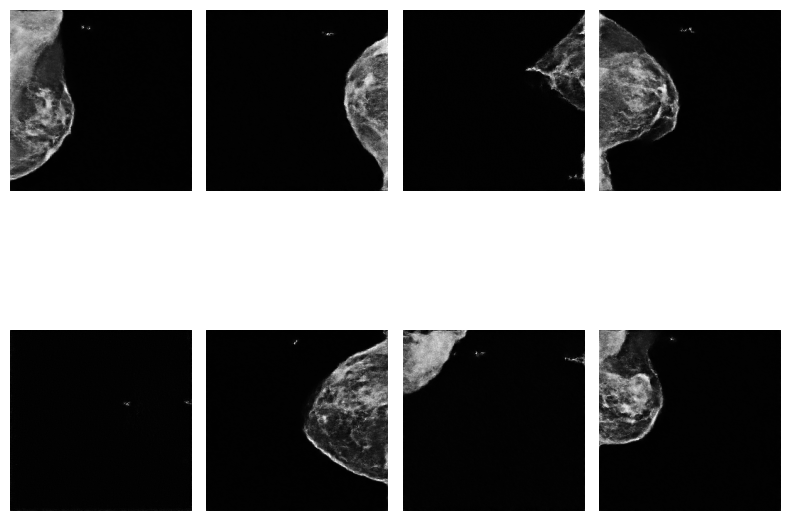

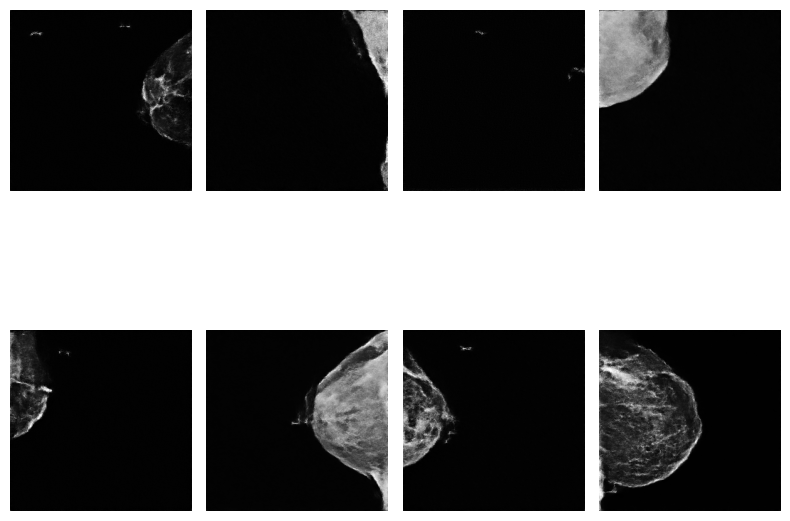

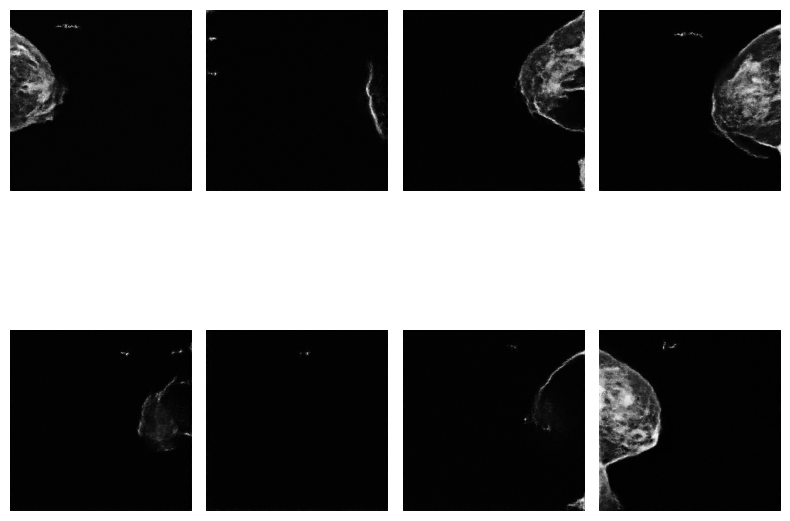

In [12]:
import matplotlib.pyplot as plt

# if CONDITIONAL:
for v in GUIDE_SCALES:
    vis_samples = dd[v]
    plt.figure(figsize=(8, 8))           
    for i in range(8):                   # ⟵ only 8 images
        plt.subplot(2, 4, i + 1)         # 2 × 2 grid
        plt.axis("off")
        plt.imshow(vis_samples[i, 0].cpu(), cmap="gray", vmin=0, vmax=1)
    plt.tight_layout()
    plt.savefig("./inference_snapshots/samples_grid.png", dpi=300)
    plt.show()

# else:
#     plt.style.use("default")
#     plt.imshow(chain[0, 0].cpu(), cmap="gray", vmin=0, vmax=1)
#     plt.axis("off")
#     plt.tight_layout()

#     plt.show()


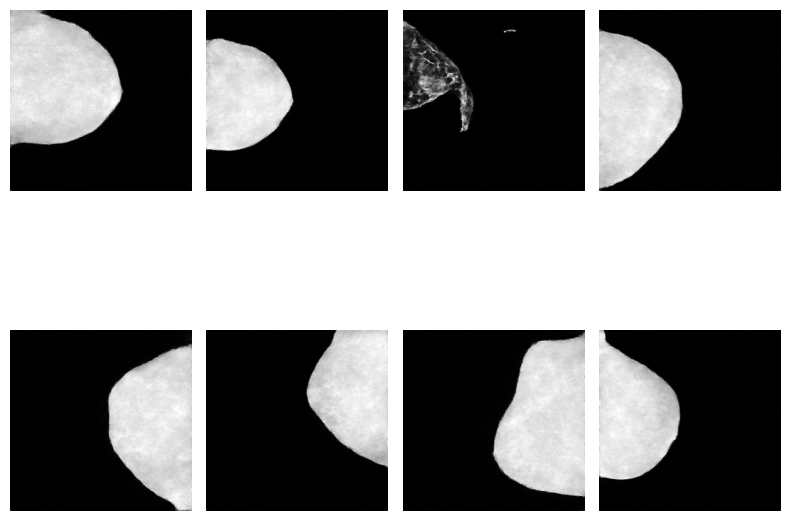

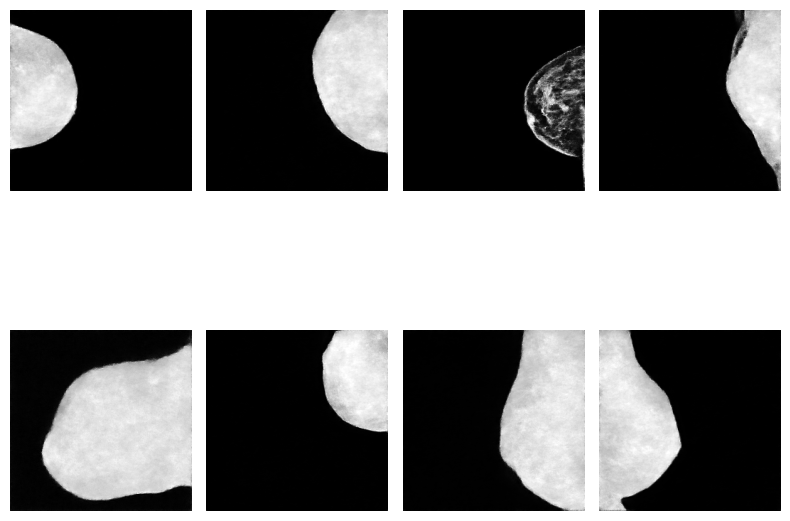

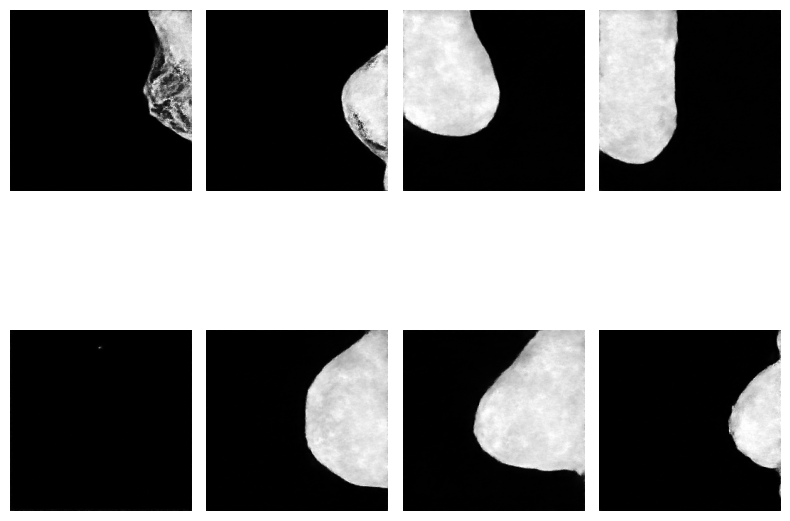

In [6]:
import matplotlib.pyplot as plt

# if CONDITIONAL:
for v in GUIDE_SCALES:
    vis_samples = dd[v]
    plt.figure(figsize=(8, 8))           
    for i in range(8):                   # ⟵ only 8 images
        plt.subplot(2, 4, i + 1)         # 2 × 2 grid
        plt.axis("off")
        plt.imshow(vis_samples[i, 0].cpu(), cmap="gray", vmin=0, vmax=1)
    plt.tight_layout()
    plt.savefig("./inference_snapshots/samples_grid.png", dpi=300)
    plt.show()

# else:
#     plt.style.use("default")
#     plt.imshow(chain[0, 0].cpu(), cmap="gray", vmin=0, vmax=1)
#     plt.axis("off")
#     plt.tight_layout()

#     plt.show()
